# 

# 神经网络的学习

## 4.1 从数据中学习
### 4.1.1 数据驱动
### 4.1.2 训练数据和测试数据

机器学习中，一般将数据分为训练数据和测试数据两部分来进行学习和实验等。

首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。

为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以成为监督数据。

只对某个数据集过度拟合的状态称为过拟合（over fitting）。

## 4.2 损失函数

神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。

### 4.2.1 均方误差

可以用作损失函数的函数有很多，其中最有名的是均方误差（mean squared error）。均方误差如下式所示。
$$
E = \frac{1}{2}\sum_k(y_k-t_k)^2        \qquad \qquad (4.1)
\\
其中，y_k表示神经网络的输出，t_k表示监督数据，k表示数的维数。
$$


In [2]:
import numpy as np


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 设2为正确解
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
e = mean_squared_error(np.array(y),np.array(t))

print(e)

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
e = mean_squared_error(np.array(y),np.array(t))
print(e)

0.09750000000000003
0.5975


### 4.2.2 交叉熵误差

除了均方误差之外，交叉熵误差（cross entropy error）也经常用作损失函数。交叉熵误差如下：

$$
E = - \sum_k t_k \ln y_k         \qquad \qquad (4.2)

其中y_k是神经网络的输出，t_k是正确解标签。并且，t_k中只有正确解的标签的索引为1，其它均为0。因此，式（4.2）实际上只计算对应正确解标签的输出的自然对数。
$$

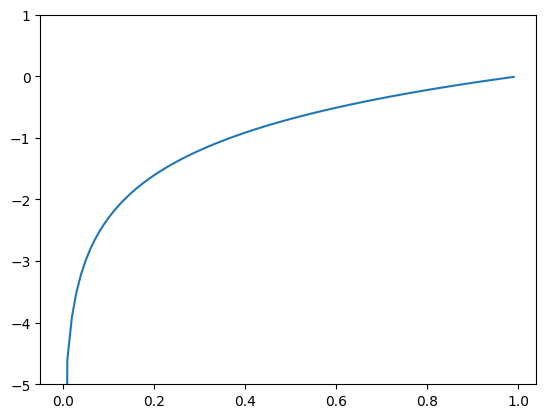

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(1e-7, 1.0, 0.01)
y = np.log(x)

plt.plot(x, y)
plt.ylim(-5.0, 1.0)
plt.show()

In [13]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
e = cross_entropy_error(np.array(y),np.array(t))
print(e)

y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
e = cross_entropy_error(np.array(y),np.array(t))
print(e)

0.510825457099338
2.302584092994546
